<a href="https://colab.research.google.com/github/slagana8/Heart_Disease_Indicators/blob/main/Indicators_of_Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Personal Key Indicators of Heart Disease
### Which variables have a significant effect on the increased chance of heart disease?
Sam Lagana 


In [190]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

# Imports
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [191]:
# Load data 
df = pd.read_csv("/content/drive/MyDrive/Project 2/heart_2020 .csv")
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


- No uncecessary columns to delete

## Data Cleaning

In [192]:
# Check for duplicates and missing data 
print("Missing data:\n",df.isna().sum())
print("\n")
print("Duplicates:", df.duplicated().sum())

Missing data:
 HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64


Duplicates: 27


In [193]:
# Drop duplicates
df.drop_duplicates(inplace = True)

In [194]:
# Confirm drop 
df.duplicated().sum()

0

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9418 entries, 0 to 9444
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HeartDisease      9418 non-null   object 
 1   BMI               9418 non-null   float64
 2   Smoking           9418 non-null   object 
 3   AlcoholDrinking   9418 non-null   object 
 4   Stroke            9418 non-null   object 
 5   PhysicalHealth    9418 non-null   int64  
 6   MentalHealth      9418 non-null   int64  
 7   DiffWalking       9418 non-null   object 
 8   Sex               9418 non-null   object 
 9   AgeCategory       9418 non-null   object 
 10  Race              9418 non-null   object 
 11  Diabetic          9418 non-null   object 
 12  PhysicalActivity  9418 non-null   object 
 13  GenHealth         9418 non-null   object 
 14  SleepTime         9418 non-null   int64  
 15  Asthma            9418 non-null   object 
 16  KidneyDisease     9418 non-null   object 


Check for inconsistencies in categorical values

In [196]:
# Heart Disease column 
df["HeartDisease"].unique()

array(['No', 'Yes'], dtype=object)

In [197]:
# Smoking column 
df["Smoking"].unique()

array(['Yes', 'No'], dtype=object)

In [198]:
# Diff Walking column 
df["DiffWalking"].unique()

array(['No', 'Yes'], dtype=object)

In [199]:
# Sex Column 
df["Sex"].unique()

array(['Female', 'Male'], dtype=object)

In [200]:
# Age Category Column 
df["AgeCategory"].unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [201]:
# Race Column 
df["Race"].unique()

array(['White', 'Black', 'Asian', 'American Indian/Alaskan Native',
       'Other', 'Hispanic'], dtype=object)

In [202]:
# Diabetic Column 
df["Diabetic"].unique()

array(['Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)'],
      dtype=object)

In [203]:
# Replace with more manageable values
df["Diabetic"] = df["Diabetic"].replace(to_replace = ("No, borderline diabetes"), value = "Borderline")
df["Diabetic"] = df["Diabetic"].replace(to_replace = "Yes (during pregnancy)", value = "During Pregnancy")

In [204]:
# Confirm Replacement
df["Diabetic"].unique()

array(['Yes', 'No', 'Borderline', 'During Pregnancy'], dtype=object)

In [205]:
# Physical Activity Column 
df["PhysicalActivity"].unique()

array(['Yes', 'No'], dtype=object)

In [206]:
# GenHealth Column 
df["GenHealth"].unique()

array(['Very good', 'Fair', 'Good', 'Poor', 'Excellent'], dtype=object)

In [207]:
# Asthma column 
df["Asthma"].unique()

array(['Yes', 'No'], dtype=object)

In [208]:
# Kidney Disease Column 
df["KidneyDisease"].unique()

array(['No', 'Yes'], dtype=object)

In [209]:
# Skin Cancer
df["SkinCancer"].unique()

array(['Yes', 'No'], dtype=object)

## Univariate Visuals for Categorical Features

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9418 entries, 0 to 9444
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HeartDisease      9418 non-null   object 
 1   BMI               9418 non-null   float64
 2   Smoking           9418 non-null   object 
 3   AlcoholDrinking   9418 non-null   object 
 4   Stroke            9418 non-null   object 
 5   PhysicalHealth    9418 non-null   int64  
 6   MentalHealth      9418 non-null   int64  
 7   DiffWalking       9418 non-null   object 
 8   Sex               9418 non-null   object 
 9   AgeCategory       9418 non-null   object 
 10  Race              9418 non-null   object 
 11  Diabetic          9418 non-null   object 
 12  PhysicalActivity  9418 non-null   object 
 13  GenHealth         9418 non-null   object 
 14  SleepTime         9418 non-null   int64  
 15  Asthma            9418 non-null   object 
 16  KidneyDisease     9418 non-null   object 


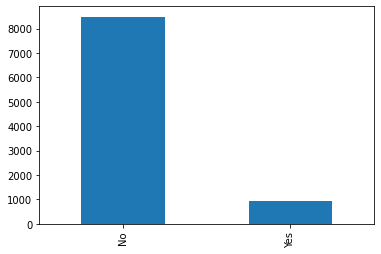

In [211]:
# Heart Disease (target)
df["HeartDisease"].value_counts().plot(kind = "bar");

This visualization shows that in our target (Heart Disease) there are significantly less people who have the disease then who don't

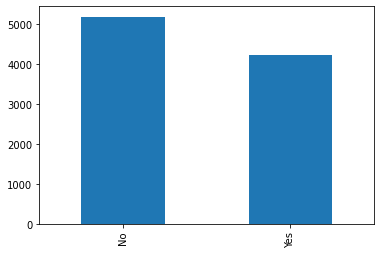

In [212]:
# Smoking (feature)
df["Smoking"].value_counts().plot(kind = "bar");

Consistent Data is shown. 

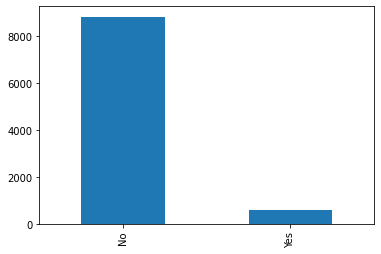

In [213]:
# Alcohol Drinking (feature)
df["AlcoholDrinking"].value_counts().plot(kind = "bar");

Data is skewed towards the answer of not being a heavy drinker

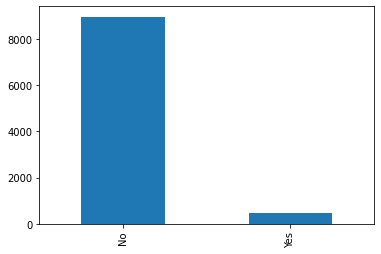

In [214]:
# Stroke (feature)
df["Stroke"].value_counts().plot(kind = "bar");

Data shows significantly less people have had a stroke.

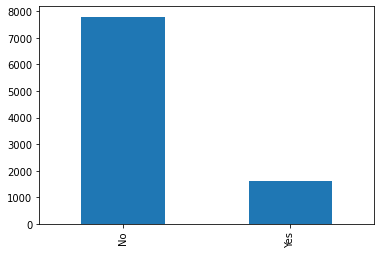

In [215]:
# Diff Walking (feature)
df["DiffWalking"].value_counts().plot(kind = "bar");

Data shows that significantly less people have trouble walking then do. 

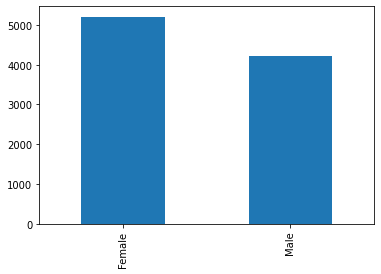

In [216]:
# Sex (feature)
df["Sex"].value_counts().plot(kind = "bar");

Data seems to be consistent 

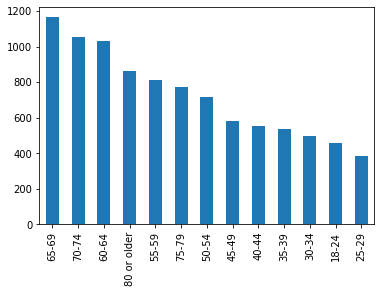

In [217]:
# Age category (feature)
df["AgeCategory"].value_counts().plot(kind = "bar");

Data seems to be consistent 

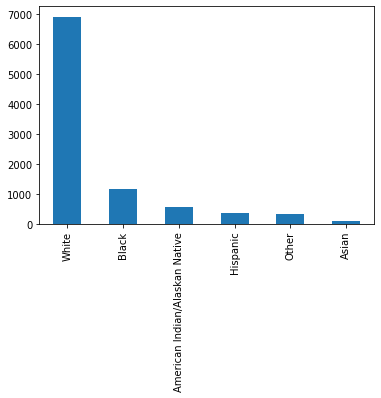

In [218]:
# Race (feature)
df["Race"].value_counts().plot(kind = "bar");

Data is shows significantly more White people were sampled.

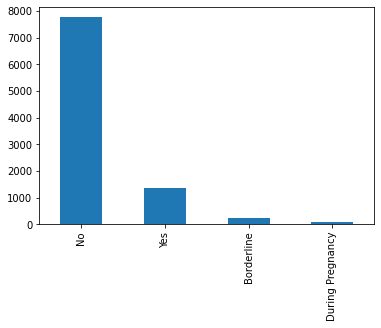

In [219]:
# Diabetes (feature)
df["Diabetic"].value_counts().plot(kind = "bar");

Data shows significantly more people answered no.

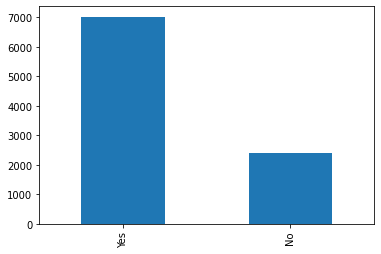

In [220]:
# Physical Activity (feature)
df["PhysicalActivity"].value_counts().plot(kind = "bar");

Data showed significantly more people answered yes.

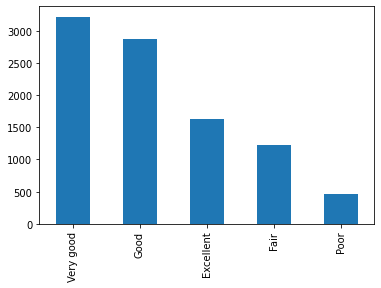

In [221]:
# GenHealth (feature)
df["GenHealth"].value_counts().plot(kind = "bar");

Data seems to be consistent

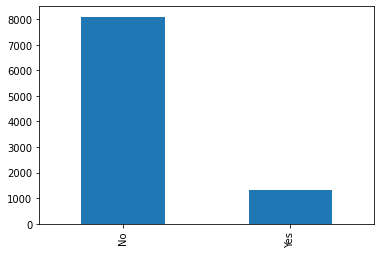

In [222]:
# Asthma (feature)
df["Asthma"].value_counts().plot(kind = "bar");

Data shows more people answered No.

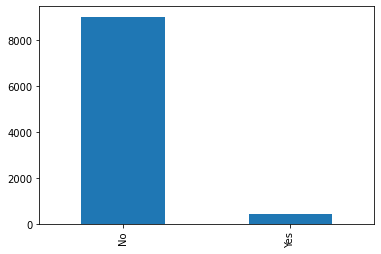

In [223]:
# KidneyDisease (feature)
df["KidneyDisease"].value_counts().plot(kind = "bar");

Data shows more people don't have kidney disease in this set

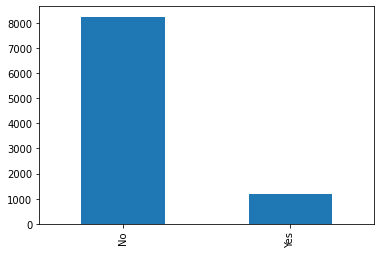

In [224]:
# Skin Cancer (feature)
df["SkinCancer"].value_counts().plot(kind = "bar");

More people don't have Skin Cancer in this data set

For all the categorical columns all data seems to be pretty consistent. Even though in most of them one feature is more common then the other since our target is if they have Heart Disease or not I believe it represents what would be true since more people don't have Heart Disease in this data set. 

## Univariate Visuals for Numerical Features

In [225]:
df["BMI"].describe()

count    9418.000000
mean       28.623224
std         6.445283
min        12.480000
25%        24.210000
50%        27.460000
75%        31.890000
max        82.760000
Name: BMI, dtype: float64

In [226]:
# Locate outlier in BMI
df.loc[df["BMI"]== 82.760000,:]

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
9088,No,82.76,No,No,No,1,0,No,Female,50-54,Hispanic,Yes,Yes,Good,10,No,No,No


In [227]:
# Drop data point
df.drop(index = 9088, inplace = True)

In [228]:
# Confirm deletion 
df.loc[df["BMI"]== 82.760000,:]

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer


In [229]:
# Explore other outlier
df.loc[df["BMI"]== 75.820000,:]

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
561,No,75.82,No,No,No,0,0,No,Female,50-54,White,No,Yes,Good,8,Yes,Yes,No


In [230]:
# Drop data point
df.drop(index = 561, inplace = True)

In [231]:
# Confirm Deletion 
df.loc[df["BMI"]== 75.820000,:]

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer


In [236]:
df.loc[df["BMI"]==75.77,:]

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
9358,Yes,75.77,Yes,Yes,Yes,0,30,Yes,Male,30-34,Black,Yes,No,Fair,15,Yes,No,No


In [232]:
# Explore min outlier
df.loc[df["BMI"]==12.48000,:]

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
1688,Yes,12.48,Yes,No,Yes,12,2,No,Male,50-54,Black,No,No,Fair,12,No,Yes,No


While exploring the BMI feature I noticed three outlier data points I wanted to explore further. While it is possible to have a high BMI of > 75 I determined it would be highly unlikely for this to happen and have no heart disease. When looking at the min for the feature I discovered it was 12.48. After exploring further I decided not to drop the outlier because the rest of the data features for this row seem to be consistent. I checked investegated further outliers after removing the first two and came to the conclusion they were possible. 

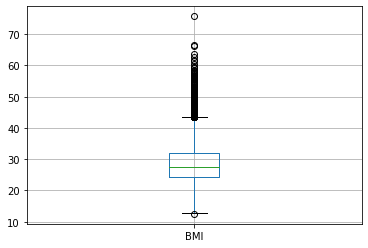

In [233]:
# BMI Boxplot 
df.boxplot(column = "BMI");

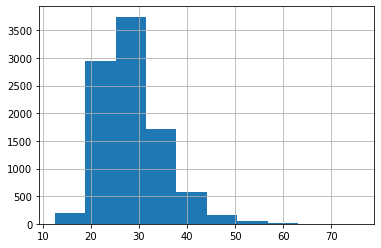

In [234]:
# BMI Histogram
df["BMI"].hist();

Data has some outliers but most of the data points fall between the 20 and 35 range. 

In [238]:
df["PhysicalHealth"].describe()

count    9416.000000
mean        3.854822
std         8.358284
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max        30.000000
Name: PhysicalHealth, dtype: float64

Since this represents amount of days excersised in the last 30 days I believe all this data is consistent.

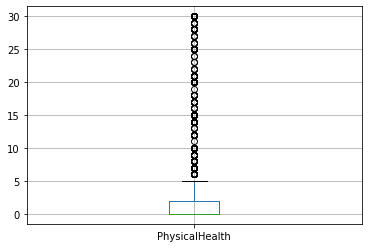

In [240]:
# Physical Health Boxplot
df.boxplot(column = "PhysicalHealth");

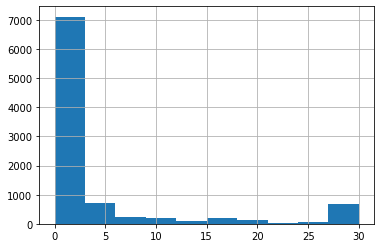

In [245]:
# Physical Health Histogram
df["PhysicalHealth"].hist();

These visuals show there are a lot of outliers with the majority of the data points lying between 0 and 5. I believe this is accurate because this represents how many days their physical health wasn't up to par out of 30 days. 

In [243]:
df["MentalHealth"].describe()

count    9416.000000
mean        3.798428
std         7.938648
min         0.000000
25%         0.000000
50%         0.000000
75%         3.000000
max        30.000000
Name: MentalHealth, dtype: float64

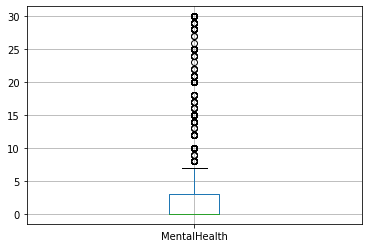

In [246]:
# Mental Health Box Plot
df.boxplot(column = "MentalHealth");

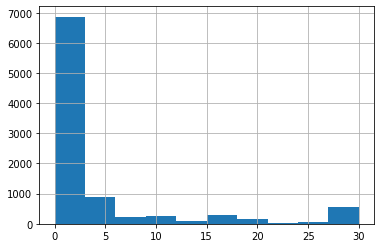

In [249]:
# Mental Health Histogram
df["MentalHealth"].hist();

These visuals show there are a lot of outliers with the majority of the data points lying between 0 and 5. I believe this is accurate because this represents how many days their mental health wasn't up to par out of 30 days. 

In [251]:
df["SleepTime"].describe()

count    9416.000000
mean        7.125956
std         1.520496
min         1.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        20.000000
Name: SleepTime, dtype: float64

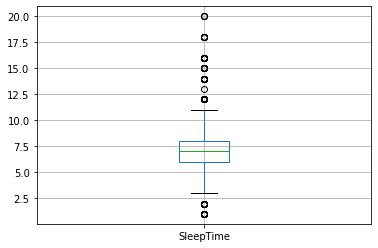

In [252]:
# Sleep time Box Plot
df.boxplot(column = "SleepTime");

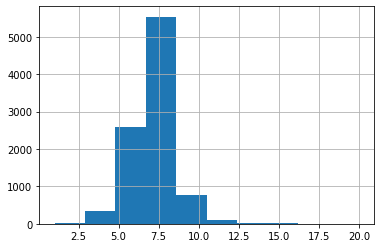

In [253]:
# Sleep Time Histogram
df["SleepTime"].hist();

These visuals show that most of the data points fall between 5 and 10. Values represent hours of sleep in a 24 hour period. There are some outliers but while they might be uncommon I do believe they are still possible. 

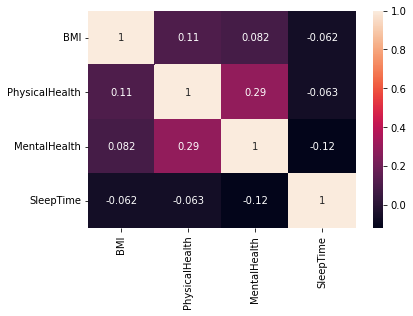

In [254]:
# Heatmap
corr = df.corr()
sns.heatmap(corr, annot = True);

None of the features seem to have a moderate or strong correlation between each other. 